In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

from sklearn.metrics import r2_score
from scipy.stats import pearsonr

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
os.chdir('C:/Users/raj3599/Desktop/letsuprade/Day 21')

In [3]:
df = pd.read_excel('Linear Regression.xlsx')
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [5]:

df.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [6]:

df.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


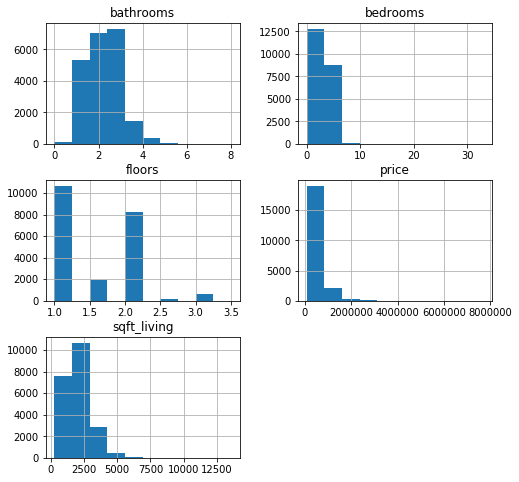

In [7]:
df.hist(figsize=(8,8))
plt.show()

Inference from Histogram:
Bathrooms is Unimodal and has negative Skewness ie Mean < Median
Bedrooms is Unimodal and has positive Skewness ie Mean > Median
Price is Unimodal and has positive Skewness ie Mean > Median
Sqft_living is Unimodal and has positive Skewness ie Mean > Median
Floors is Multimodal

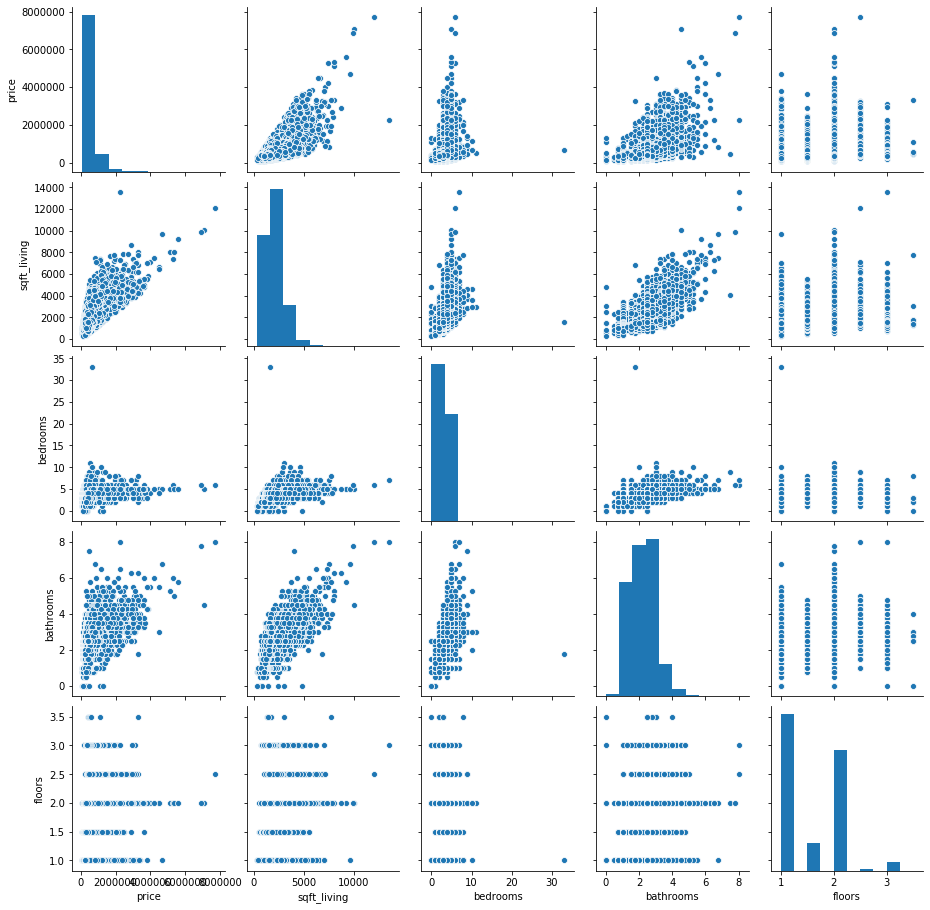

In [9]:
sns.pairplot(df)

# Relationship Between variables

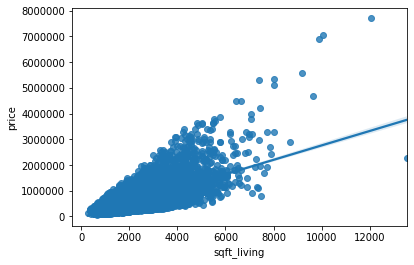

In [10]:
sns.regplot(df.sqft_living, df.price)

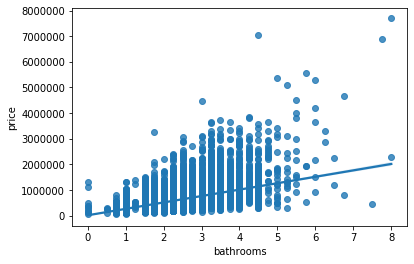

In [11]:
sns.regplot(df.bathrooms, df.price)

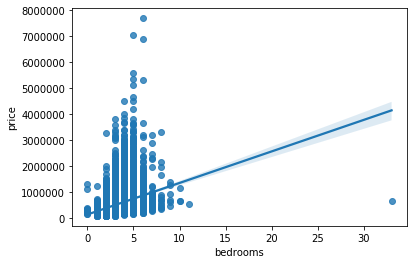

In [12]:
sns.regplot(df.bedrooms, df.price)

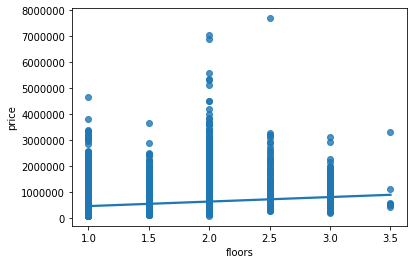

In [13]:
sns.regplot(df.floors, df.price)

The Dependent variable "price" :

It has Strong Relation with area of living in square feet
It has moderate Relation with number of bathrooms and bedrooms
It has almost no Relation with number of floors.

# Applying Linear Regression

Price V/S area of living in square feet (sqft_living)

In [14]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [15]:
x = df.iloc[:,1:2]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [16]:
y = df.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=3)

In [18]:
lin_reg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [-44152.78861096]
Coefficient is:  [[280.51365758]]


price = - 41947.45007397 + 279.51011494 (sqft_living)

In [20]:
ypred = lin_reg.predict(x_test)
print("Predicted values:\n")
print(ypred)

Predicted values:

[[ 404669.06351381]
 [1220963.80706574]
 [ 850685.7790628 ]
 ...
 [ 295268.73705839]
 [ 553341.30203014]
 [ 208309.50320922]]


In [21]:
print("r square value is: ", r2_score(y_test, ypred))

r square value is:  0.49480151511572157


# Price V/S Bedrooms

In [22]:
x1 = df.iloc[:,2:3]
x1.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [23]:

y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [24]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state = 2)

In [28]:
lin_reg.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [142835.36507295]
Coefficient is:  [[118301.95858814]]


price = 142835.36507296 + 118301.95858814 (bedrooms)

In [30]:
y_pred1 = lin_reg.predict(x1_test)
print("Predicted values:\n")
print(y_pred1)

Predicted values:

[[616043.19942552]
 [497741.24083738]
 [379439.28224924]
 ...
 [616043.19942552]
 [497741.24083738]
 [616043.19942552]]


In [31]:
print("The r square value is: ", r2_score(y1_test, y_pred1))

The r square value is:  0.10373065781231294


# Price as Dependent Variable and all Other Variables as Independent Variable

In [32]:
x4 = df.drop(['price'], axis=1)
x4.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [33]:

y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [34]:
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y,test_size=0.3,random_state=2)

In [35]:
lin_reg.fit(x4_train,y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [73808.86183529]
Coefficient is:  [[   306.72838252 -55720.77178327   8705.50888837   -266.52957882]]


price = 73808.86183529 + 306.72838252(sqft_living) - 55720.77178327(bedrooms) + 8705.50888837(bathrooms) - 266.52957882(floors)

In [37]:
y_pred4 = lin_reg.predict(x4_test)
print("Predicted values:\n")
print(y_pred4)

Predicted values:

[[609328.77721079]
 [585038.87031192]
 [415562.45223517]
 ...
 [599102.75434259]
 [339784.19873135]
 [516024.79183523]]


In [38]:
print("The r square value is: ", r2_score(y4_test, y_pred4))

The r square value is:  0.5105722437453338
